CHIBUIKE OKOROAMA: C0892150

DSMM TERM-3 AML3104 ASSIGNMENT 3



In [1]:
# TensorFlow and tf.keras and important libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

DATASET (Tensoflow.org)
Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [2]:
# load MINST dataset
# The train_images and train_labels arrays are the training set which the data the model uses to learn.
# The model is tested against the test set, the test_images, and test_labels arrays.
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape # shows the train data shape

(60000, 28, 28)

In [4]:
len(train_labels) # lenght of train labels

60000

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape# shows the train data shape

(10000, 28, 28)

In [7]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [8]:
len(test_labels) # lenght of test labels

10000

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [9]:
# assign labels name before feeding the network
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

DATA PREPROCESSING

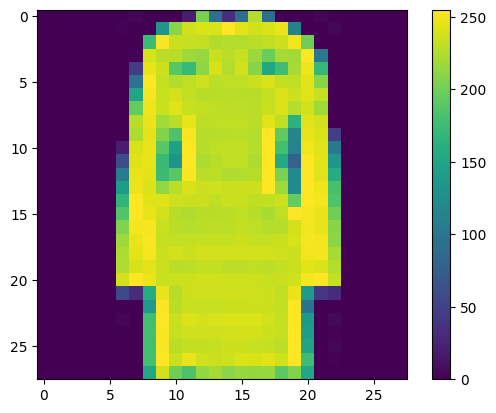

In [10]:
# inspecting the images and they fall in the range of 0 to 255 pixel
plt.figure()
plt.imshow(train_images[500])
plt.colorbar()
plt.grid(False)
plt.show()

Next is to scale the vlaues to range between 0 to 1

In [11]:
train_images = train_images / 255.0 # scaling the trainig dataset

test_images = test_images / 255.0 # scaling the test dataset

VISUALIZATION

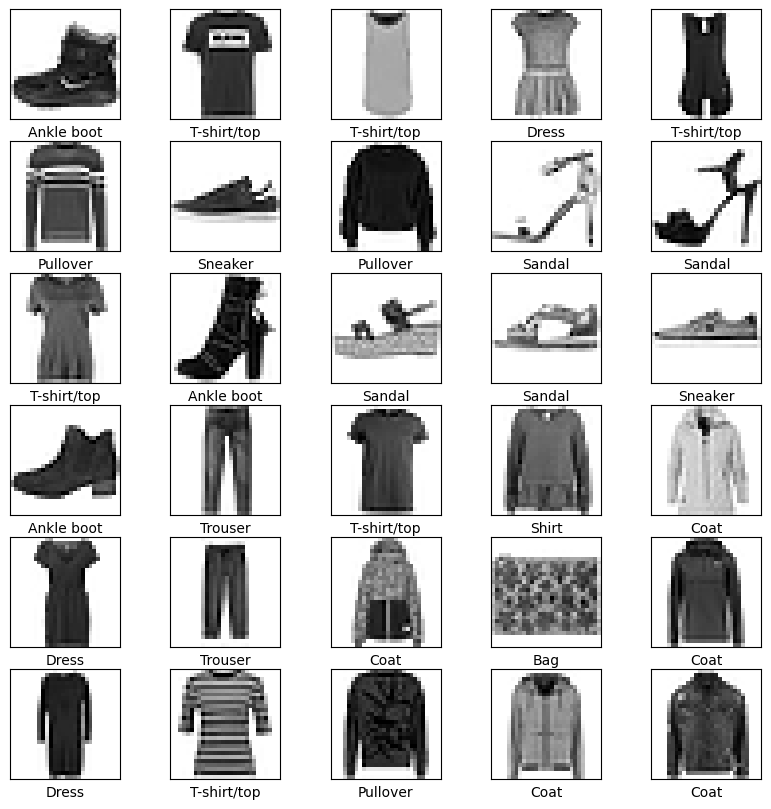

In [12]:
# verify the data is in the right format before building and train the network.
# the the code below display forst 25 images from the training dataset

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

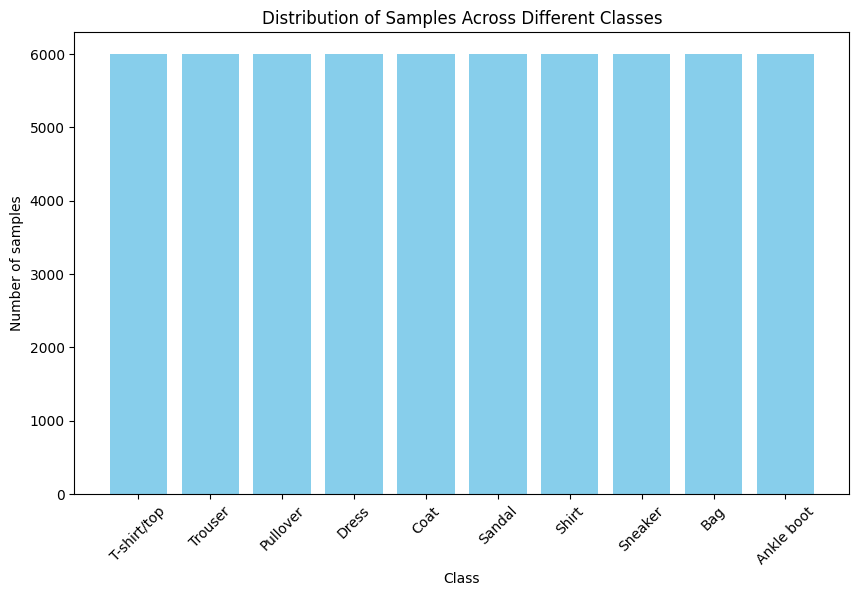

In [ ]:
# Create a bar chart showing the distribution of samples across different classes
# Count the number of samples for each class in the training dataset
train_labels_count = np.bincount(train_labels)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_names, train_labels_count, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Distribution of Samples Across Different Classes')
plt.xticks(rotation=45)
plt.show()

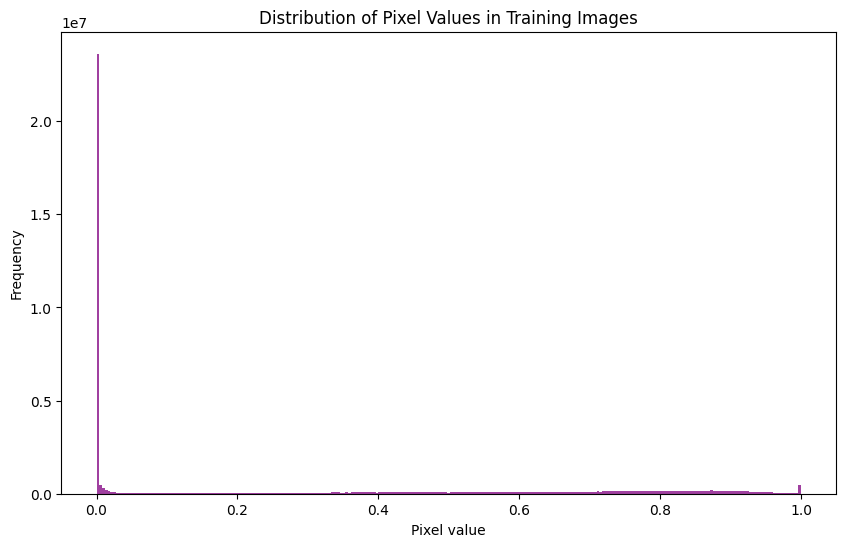

In [ ]:
# Plot histograms of the pixel values
plt.figure(figsize=(10, 6))
plt.hist(train_images.flatten(), bins=255, color='purple', alpha=0.75)
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values in Training Images')
plt.show()

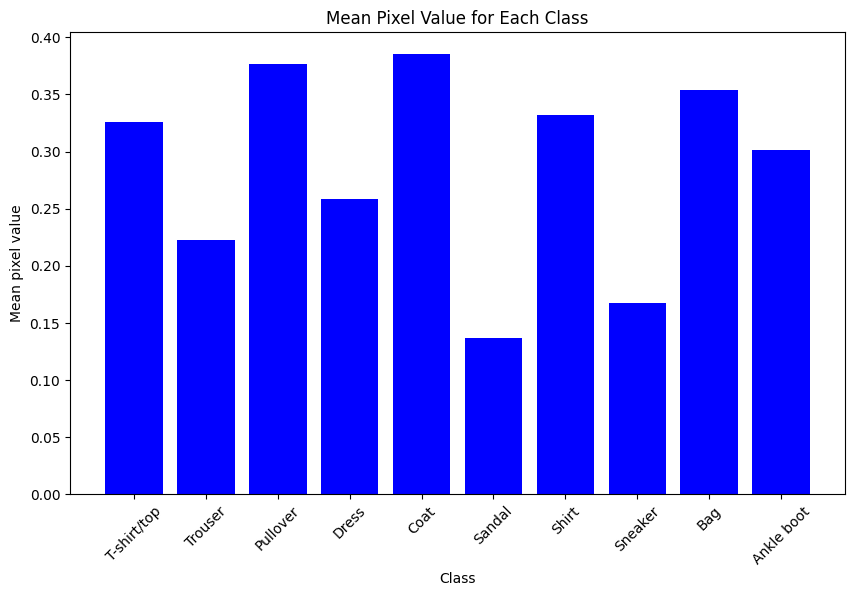

In [ ]:
# Calculate the mean and standard deviation of pixel values for each class
means = [train_images[train_labels == i].mean() for i in range(10)]
stds = [train_images[train_labels == i].std() for i in range(10)]

# Plot the means
plt.figure(figsize=(10, 6))
plt.bar(class_names, means, color='blue')
plt.xlabel('Class')
plt.ylabel('Mean pixel value')
plt.title('Mean Pixel Value for Each Class')
plt.xticks(rotation=45)
plt.show()




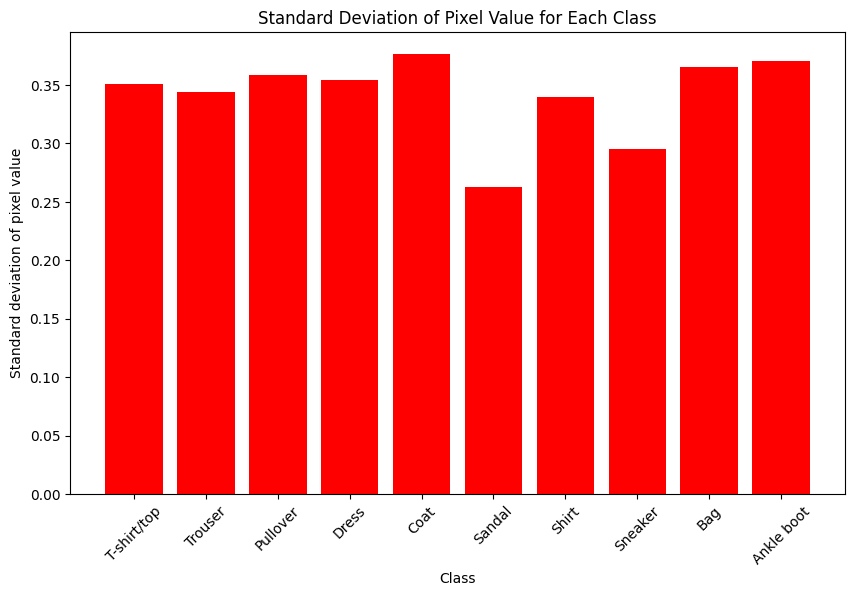

In [ ]:
# Plot the standard deviations
plt.figure(figsize=(10, 6))
plt.bar(class_names, stds, color='red')
plt.xlabel('Class')
plt.ylabel('Standard deviation of pixel value')
plt.title('Standard Deviation of Pixel Value for Each Class')
plt.xticks(rotation=45)
plt.show()

MODEL BIUILDING

In [13]:
# first set up the first layer of Simple ANN model with ReLU & Softmax
#Flatten converts the 28*28 pixel 2D to 1D 28*28=784
# ReLU is used to learn complex patterns (128 neurons)
# Softmax is use to convert the output from into probabilities. It has 10 neurons. Softmax is used instead of sigmoid
# Model 1: Simple ANN
model_1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])



In [ ]:
# Model 2: Adding More Layers with softmax as output that turns ReLU 0 & 1 to probabilities
model_2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

FURTHER LAYERS WITH DIFFERENT ACTIVATION

**Model 3** experiments with different activation functions (tanh instead of ReLU) to see how the network performs with a different type of non-linearity. For modelk 3 is grayed becaused of computayion time.

**Model 4** introduces dropout layers to prevent overfitting and improve generalization by randomly dropping units during training.

In [ ]:
'''
# Model 3: Different Activation Functions
# fully connected layer with 256 neurons, using the ReLU activation function to introduce non-linearity.
model_3 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='tanh'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(10, activation='softmax')
])
'''

In [ ]:
# Model 4: Adding Dropout Layers
# A dropout layer with a dropout rate of 0.5.
# During training, this layer randomly sets 50% of the input units to 0 at each update step to prevent overfitting.
# Overfitting occurs when a model performs well on training data but poorly on unseen test data, as it has learned to memorize the training data rather than generalize from it.
model_4 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Function to compile, train, and evaluate the model
def compile_train_evaluate(model):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print('\nTest accuracy:', test_acc)



In [ ]:
# Experiment with different models
print("Experiment 1: Simple ANN")
compile_train_evaluate(model_1)

print("Experiment 2: Adding More Layers")
compile_train_evaluate(model_2)

#print("Experiment 3: Different Activation Functions")
#compile_train_evaluate(model_3)

print("Experiment 4: Adding Dropout Layers")
compile_train_evaluate(model_4)

Experiment 1: Simple ANN
Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 3.5411 - accuracy: 0.6985 - val_loss: 0.7501 - val_accuracy: 0.7588
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6943 - accuracy: 0.7714 - val_loss: 0.6407 - val_accuracy: 0.7764
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6114 - accuracy: 0.7794 - val_loss: 0.6089 - val_accuracy: 0.7891
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5720 - accuracy: 0.7897 - val_loss: 0.5358 - val_accuracy: 0.8125
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5479 - accuracy: 0.8044 - val_loss: 0.5460 - val_accuracy: 0.8034
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5175 - accuracy: 0.8169 - val_loss: 0.5724 - val_accuracy: 0.8067
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4972 - accuracy: 0.8249 - val_los

In [ ]:
# Function to predict classes for test set and display sample predictions
def predict_and_display(model, test_images, test_labels, class_names, num_samples=5):
    # Predict classes for test images
    predictions = model.predict(test_images)

    # Randomly select a few samples from the test set
    sample_indices = np.random.choice(test_images.shape[0], num_samples, replace=False)

    # Plot the images and their predicted classes
    plt.figure(figsize=(15, 10))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(test_images[idx], cmap='gray')
        plt.title(f'Predicted: {class_names[np.argmax(predictions[idx])]}\nTrue: {class_names[test_labels[idx]]}')
        plt.axis('off')
    plt.show()

Model 1 Predictions:
313/313 [==============================] - 1s 2ms/step


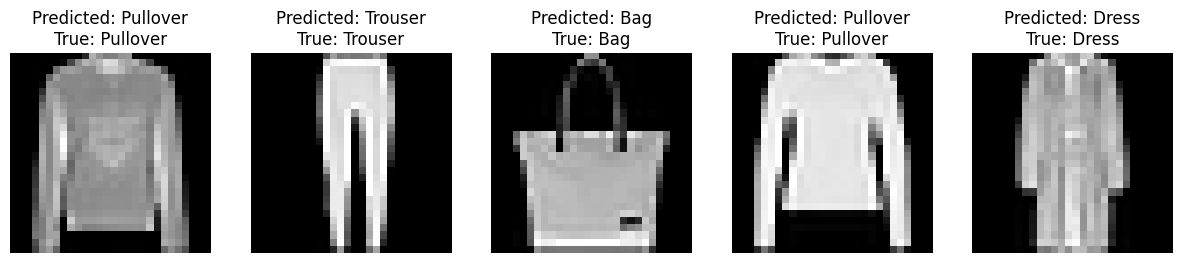

Model 2 Predictions:
313/313 [==============================] - 1s 2ms/step


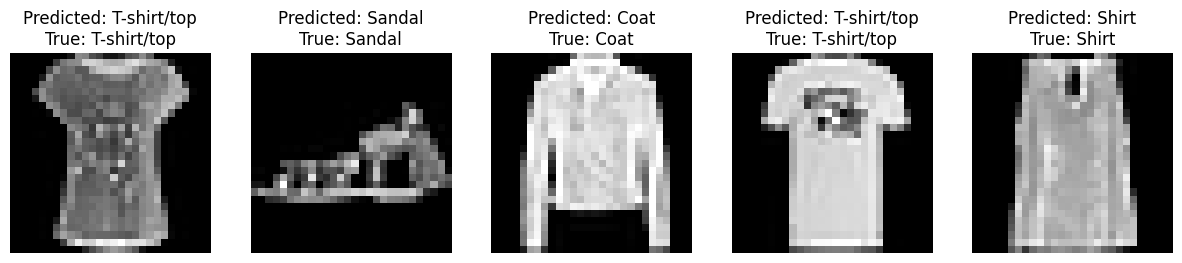

Model 4 Predictions:
313/313 [==============================] - 1s 2ms/step


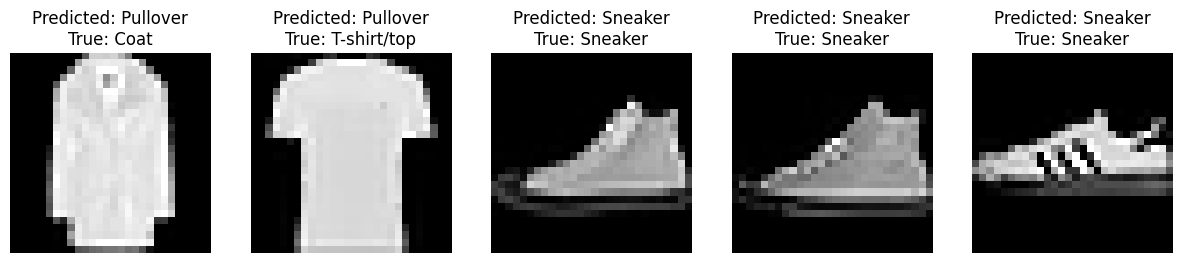

In [ ]:
# Define class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Example usage for each model
print("Model 1 Predictions:")
predict_and_display(model_1, test_images, test_labels, class_names)

print("Model 2 Predictions:")
predict_and_display(model_2, test_images, test_labels, class_names)

#print("Model 3 Predictions:")
#predict_and_display(model_3, test_images, test_labels, class_names)

print("Model 4 Predictions:")
predict_and_display(model_4, test_images, test_labels, class_names)

Conclusion

While the model had good accuracy, model 4 performs the least becasue it made Pullover predictions wrong.